<a href="https://colab.research.google.com/github/siojaf/.github-workflows/blob/main/week%204%20classification%20with%20logistic%20regression/week_4_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color='#FFE15D'><b>💎 Week 4: Classification with Logistic Regression</b></font>
### Pytorch Free Course [webpage](https://howsam.org/downloads/pytorch-courset/)

### Source Codes on Github [pytorch-course-free](https://github.com/howsam/pytorch-course-free.git)

### by Howsam AI Academy www.howsam.org


## ◀️ **Recap 👀**

<font size=5>PyTorch is a python package that provides two high-level features:</font>
*   <font size=5>Tensor computation (<font size=5 color="EE4E4E">like numpy</font>) with strong <font size=5 color="F4CE14">GPU</font> acceleration</font>
*   <font size=5><font size=5 color="3AA6B9">Deep Neural Networks</font> built on a tape-based <font size=5 color="F075AA">autograd</font> system</font>

<font size=5>✅ **Week 1**: Torch as Numpy </font>

<font size=5>✅ **Week 2**: Linear Regression with Torch API </font>

<font size=5>✅ **Week 3**: Linear Regression Autograd </font>

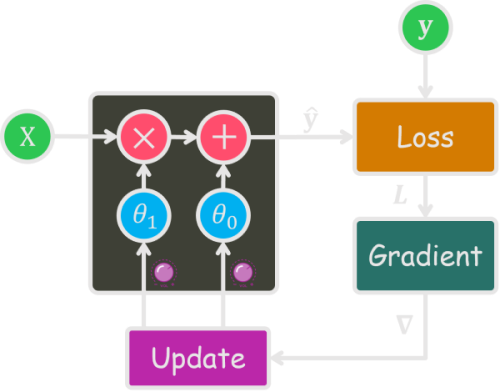

<font size=5><font size=6 color="EE4E4E">**Five**</font> Main Steps of the Training Procedure:</font>

&nbsp; &nbsp; &nbsp; &nbsp;<font size=5>1️⃣ Data </font>

&nbsp; &nbsp; &nbsp; &nbsp;<font size=5>2️⃣ Model </font>

&nbsp; &nbsp; &nbsp; &nbsp;<font size=5>3️⃣ Loss </font>

&nbsp; &nbsp; &nbsp; &nbsp;<font size=5>4️⃣ Gradient </font>

&nbsp; &nbsp; &nbsp; &nbsp;<font size=5>5️⃣ Update </font>


## 🟪 **Increasing the output font size in Colab cells**

In [80]:
# from IPython.display import HTML
# shell = get_ipython()

# def adjust_font_size():
#   display(HTML('''<style>
#     body {
#       font-size: 30px;
#     }
#   '''))

# if adjust_font_size not in shell.events.callbacks['pre_execute']:
#   shell.events.register('pre_execute', adjust_font_size)

In [51]:
a = 3
a

3

## 🟥 **Imports**

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from torch.optim import SGD

In [53]:
torch.__version__

'2.6.0+cu124'

## 🟥 **Step 1: Data**

https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [54]:
df = pd.read_csv("diabetes.csv")
num_samples, num_features = df.shape
num_features -= 1
print(num_samples, num_features)
df.head()

768 8


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
X = df.drop(["Outcome"], axis=1).values
y = df['Outcome'].values.reshape(-1, 1)
X.shape, y.shape

((768, 8), (768, 1))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614, 1), (154, 8), (154, 1))

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((552, 8), (552, 1), (62, 8), (62, 1))

In [58]:
x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
X_valid = x_scaler.transform(X_valid)
X_test = x_scaler.transform(X_test)

In [59]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

(torch.Size([552, 8]),
 torch.Size([552, 1]),
 torch.Size([62, 8]),
 torch.Size([62, 1]),
 torch.Size([154, 8]),
 torch.Size([154, 1]))

In [60]:
train_set = TensorDataset(X_train, y_train)
valid_set = TensorDataset(X_valid, y_valid)
test_set = TensorDataset(X_test, y_test)

In [61]:
train_loader = DataLoader(train_set, batch_size=100, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=80)
test_loader = DataLoader(test_set, batch_size=400)

In [62]:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([100, 8]), torch.Size([100, 1]))

In [81]:
len(train_loader)

6

In [64]:
len(train_set)

552

## 🟥 **Step 2: Model**

### 🟧 **Method 1**

In [65]:
model = nn.Linear(num_features, 1)
model

Linear(in_features=8, out_features=1, bias=True)

In [66]:
y_hat = torch.sigmoid(model(x_batch))
y_hat.shape

torch.Size([100, 1])

### 🟧 **Method 2**

In [67]:
model = nn.Sequential(
    nn.Linear(num_features, 1),
    nn.Sigmoid()
    )
model

Sequential(
  (0): Linear(in_features=8, out_features=1, bias=True)
  (1): Sigmoid()
)

In [68]:
y_hat = model(x_batch)
y_hat.shape

torch.Size([100, 1])

In [69]:
model[0], model[1], model[0].weight, model[0].bias

(Linear(in_features=8, out_features=1, bias=True),
 Sigmoid(),
 Parameter containing:
 tensor([[-0.2799,  0.3087, -0.2154, -0.0903, -0.0670, -0.0715,  0.2249, -0.3098]],
        requires_grad=True),
 Parameter containing:
 tensor([0.2228], requires_grad=True))

## 🟥 **Step 3: Loss**

In [70]:
loss_fn = nn.BCELoss()
loss_fn

BCELoss()

In [71]:
loss_fn(y_hat, y_batch)

tensor(0.8249, grad_fn=<BinaryCrossEntropyBackward0>)

## 🟥 **Step 4: Optimizer**

In [72]:
optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

## 🟥 **Step 5: Train**

In [73]:
n_epochs = 10
loss_train_hist, loss_valid_hist = [], []
acc_train_hist, acc_valid_hist = [], []

In [74]:
len(train_loader)

6

In [75]:
for epoch in range(n_epochs):

  mean_loss_train, mean_loss_valid = 0, 0
  mean_acc_train, mean_acc_valid = 0, 0

  for x_batch, y_batch in train_loader:

    # model
    y_hat = model(x_batch)

    # loss
    loss = loss_fn(y_hat, y_batch)

    # gradient
    loss.backward()

    # update
    optimizer.step()
    optimizer.zero_grad()

    mean_loss_train += loss.item() * len(x_batch)
    mean_acc_train += torch.sum(y_hat.round() == y_batch).item()

  mean_loss_train = mean_loss_train / len(train_set)
  mean_acc_train = mean_acc_train / len(train_set)

  loss_train_hist.append(mean_loss_train)
  acc_train_hist.append(mean_acc_train)


  with torch.no_grad():
    for x_batch, y_batch in valid_loader:
      y_hat = model(x_batch)
      loss = loss_fn(y_hat, y_batch)
      mean_loss_valid += loss.item() * len(x_batch)
      mean_acc_valid += torch.sum(y_hat.round() == y_batch).item()

    mean_loss_valid = mean_loss_valid / len(valid_set)
    mean_acc_valid = mean_acc_valid / len(valid_set)

    loss_valid_hist.append(mean_loss_valid)
    acc_valid_hist.append(mean_acc_valid)

  print(
  f"Epoch: {epoch}   "
  f"LossTrain: {mean_loss_train:.2}   "
  f"AccTrain: {mean_acc_train:.2}   "
  f"LossValid: {mean_loss_valid:.2}   "
  f"AccValid: {mean_acc_valid:.2}"
  )

Epoch: 0   LossTrain: 0.71   AccTrain: 0.48   LossValid: 0.51   AccValid: 0.77
Epoch: 1   LossTrain: 0.52   AccTrain: 0.74   LossValid: 0.42   AccValid: 0.81
Epoch: 2   LossTrain: 0.49   AccTrain: 0.75   LossValid: 0.45   AccValid: 0.79
Epoch: 3   LossTrain: 0.49   AccTrain: 0.77   LossValid: 0.48   AccValid: 0.77
Epoch: 4   LossTrain: 0.49   AccTrain: 0.77   LossValid: 0.49   AccValid: 0.77
Epoch: 5   LossTrain: 0.48   AccTrain: 0.77   LossValid: 0.48   AccValid: 0.77
Epoch: 6   LossTrain: 0.48   AccTrain: 0.78   LossValid: 0.45   AccValid: 0.81
Epoch: 7   LossTrain: 0.48   AccTrain: 0.77   LossValid: 0.44   AccValid: 0.81
Epoch: 8   LossTrain: 0.47   AccTrain: 0.77   LossValid: 0.43   AccValid: 0.82
Epoch: 9   LossTrain: 0.47   AccTrain: 0.77   LossValid: 0.43   AccValid: 0.81


In [76]:
torch.sum(y_hat.round() == y_batch)

tensor(50)

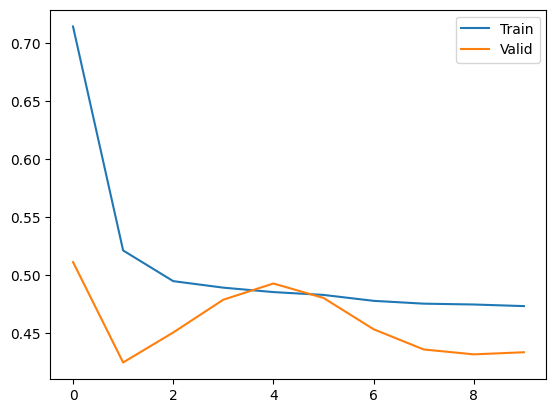

In [77]:
plt.plot(torch.arange(n_epochs), loss_train_hist)
plt.plot(torch.arange(n_epochs), loss_valid_hist)
plt.legend(["Train", "Valid"]);

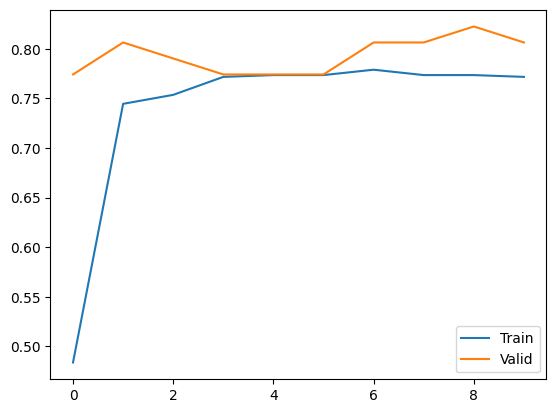

In [78]:
plt.plot(torch.arange(n_epochs), acc_train_hist)
plt.plot(torch.arange(n_epochs), acc_valid_hist)
plt.legend(["Train", "Valid"]);

## 🟥 **Test**

In [79]:
mean_acc_test = 0

with torch.no_grad():
  for x_batch, y_batch in test_loader:
    y_hat = model(x_batch)
    mean_acc_test += torch.sum(y_hat.round() == y_batch).item()
  mean_acc_test = mean_acc_test / len(test_set)

mean_acc_test

0.7727272727272727

## 🟪 **Exercise: Banana Quality**

https://www.kaggle.com/datasets/l3llff/banana

Tabular dataset contains numerical information about bananas of different quality (size, weight, sweetness, softness, harvest time, ripeness, acidity, quality).

Columns:
*   Size - size of fruit
*   Weight - weight of fruit
*   Sweetness - sweetness of fruit
*   Softness - softness of fruit
*   HarvestTime - amount of time passed from harvesting of the fruit
*   Ripeness - ripness of fruit
*   Acidity - acidity of fruit
*   Quality - quality of fruit

## 🟪 **Exercise: Mushroom Dataset**

https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset

This dataset is a cleaned version of the original [Mushroom Dataset for Binary Classification](https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset) Available at UCI Library. This dataset was cleaned using various techniques such as Modal imputation, one-hot encoding, z-score normalization, and feature selection. It contains 9 columns:

1.   Cap Diameter
2.   Cap Shape
3.   Gill Attachment
4.   Gill Color
5.   Stem Height
6.   Stem Width
7.   Stem Color
8.   Season
9.   Target Class - Is it edible or not?

The Target Class contains two values - 0 or 1 - where 0 refers to edible and 1 refers to poisonous.